<a href="https://colab.research.google.com/github/Mfr3ak/ML-Algorithm-Personal/blob/master/AICrowd/MiniLeaves_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline for MINILEAVES Challenge on AIcrowd
#### Author : Sharada Mohanty

## To open this notebook on Google Computing platform Colab, click below!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/88e77273624e5dcdc1d52ece742e04a4)


## Download Necessary Packages

In [0]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn

## Download data
The first step is to download our train and test datasets. We will be training a classifier on the training dataset and make predictions on test dataset.


In [1]:
#Donwload the datasets
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/test-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/all_classes.txt
    

--2020-05-05 19:17:21--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.13, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133527680 (127M) [binary/octet-stream]
Saving to: ‘train-images.npy’

train-images.npy    100%[===================>] 127.34M  31.2MB/s    in 4.8s    

2020-05-05 19:17:26 (26.5 MB/s) - ‘train-images.npy’ saved [133527680/133527680]

--2020-05-05 19:17:29--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.13, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.25


## Import packages

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
import matplotlib.pyplot as plt



## Load Data

In [0]:
train_images_path = "train-images.npy" #path where data is stored
train_labels_path = "train-labels.npy"

train_images = np.load(train_images_path)
train_labels = np.load(train_labels_path)

# Load Class mapping
class_names = [x.strip() for x in open("all_classes.txt").readlines()]

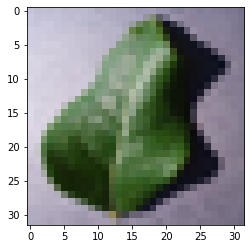

In [4]:
plt.imshow(train_images[1])

## Visualize the data

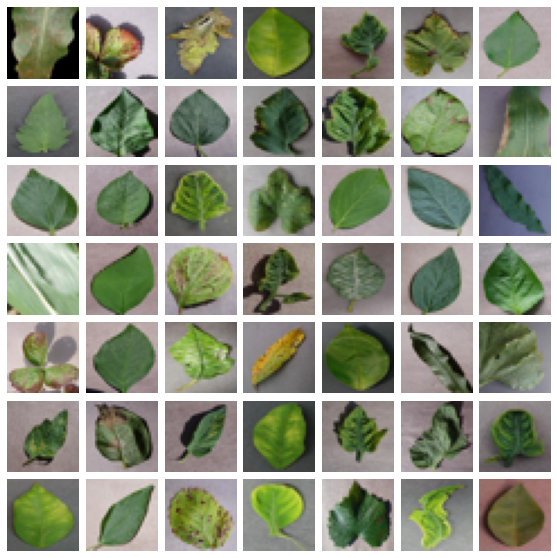

In [0]:
from mpl_toolkits.axes_grid1 import ImageGrid

def random_data_sample():
    """
    Returns a random data sample from the training set
    """
    global class_name, train_images, train_labels
    random_index = np.random.randint(0, train_images.shape[0])
    # Render the image
    image_array = train_images[random_index]
    class_label = train_labels[random_index] # an integral number in [0-38)
    class_name = class_names[class_label] # a human readable class name
    return image_array, class_label, class_name

"""
Render a 7x7 grid of 49 randomly sampled images
from the training set
"""
grid_shape = (7, 7)
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=grid_shape,  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

data_samples = [random_data_sample() for _ in range(grid_shape[0] * grid_shape[1])]
for ax, data_sample in zip(grid, data_samples):
    image_array, class_label, class_name = data_sample
    ax.imshow(image_array)
    ax.axis('off')

plt.savefig("image-grid.png")

# Dataset Distribution

<BarContainer object of 38 artists>

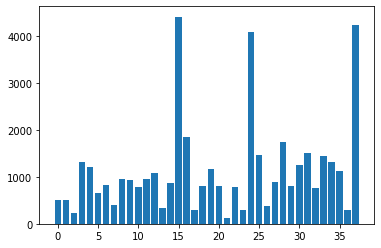

In [5]:
from collections import Counter

data_counter = Counter(train_labels)
unique_class_indices = data_counter.keys()
'''
for _class_index in unique_class_indices:
    print("Class Index : ", _class_index)
    print("Class Name : ", class_names[_class_index])
    print("Number of images in the dataset : ", data_counter[_class_index])
    print("="*100)
  '''
# TODO : Add a bar plot of the distribution of the classes here
plt.bar(data_counter.keys(),data_counter.values())

## Split Data into Train and Validation
Now we eventually want to see how well our classifier is performing, but we dont have the test data labels with us to check.
What do we do ? We split our dataset into a training set and a validation set. The idea is that we test our classifier on validation set in order to get an idea of how well our classifier works. This way we can also ensure that we dont [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) on the training dataset. 

In [0]:
X_train, X_val= train_test_split(train_images, test_size=0.2, random_state=0)
y_train, y_val= train_test_split(train_labels, test_size=0.2, random_state=0) 
## Note : Given that we use the same random state in both the splits, 
## and both `train_images` and `train_labels` have the same number of (aligned) elements, 
## the overall alignment between X_train and the corresponding Y_train will be retained. 

Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

## Define the Classifier
Now we come to the juicy part. We have fixed our data and now we train a classifier. The classifier will learn the function by looking at the inputs and corresponding outputs. There are a ton of classifiers to choose from some being [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), [SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Random Forests](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Decision Trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052), etc.   
Tip: A good model doesnt depend solely on the classifier but on the features(columns) you choose. So make sure to play with your data and keep only whats important. 

In [0]:
classifier = MLPClassifier(hidden_layer_sizes=(20, 20))

#from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

## NOTE : This is definitely not the most optimal approach for this problem. 
## This code is provided to help you get started quickly, and should be treated
## as suck

We have used a very simple [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) as a classifier here and set few of the parameteres. But one can set more parameters and increase the performance. To see the list of parameters visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

We can also use other classifiers. To read more about sklean classifiers visit [here](https://scikit-learn.org/stable/supervised_learning.html). Try and use other classifiers to see how the performance of your model changes. Try using [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) or [MLP](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and compare how the performance changes.

# Define data pre-processors

In [0]:
"""
Some of the models have different requirements in terms of what form of the data they can consume.

In this example, we will use 
a very simple Multi Layer Perceptron (explained further in the notebook), 
which expects a single dimensional representation for every data point. 

Hence, we will define some pre-processors which can help flatten the data,
and also normalize the data as necessary.
"""

def preprocess_X(X_array):
    assert X_array.shape[1:] == (32, 32, 3) # as the images are of the dimension 32x32x3
    
    # We normalize the whole array to a [0-1] range. As the pixel RGB values are uint8 values in the range[0, 256], 
    # we will normalize simply by dividing the whole array by 255
    X_array = X_array.astype(np.float32) / 255.0
    
    # Now, we will reshape the ndarray of shape (N, 32, 32, 3) to (N, 32*32*3), where N is the number of samples
    # present in the dataset
    X_array = X_array.reshape(X_array.shape[0], 32*32*3)
    return X_array

X_train = preprocess_X(X_train)
X_val = preprocess_X(X_val)

## Train the classifier

In [0]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model

Creating a Tensorflow network using pretrained resnet50

In [0]:
import tensorflow as tf

In [0]:
# Resizing and Normalizing the input to a fixed size
IMG_SIZE = 32 # given all images are of this shape

def format_image(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  return image

# applying the format_image function to train, validation and test datasets
X_train = format_image(X_train)
X_val = format_image(X_val)
#test_images = format_image(test_images)

In [0]:
from tensorflow import keras

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [0]:
# Shuffling and batching the data for better training
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = val_dataset.batch(BATCH_SIZE)
#test_batches = test_images.batch(BATCH_SIZE)

In [17]:
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
NUM_CLASSES = 38
from keras.applications.vgg19 import VGG19,preprocess_input

# Create the base model from the pre-trained model MobileNet V2
base_model = VGG19(input_shape=INPUT_SHAPE,
                   include_top=False,
                   weights='imagenet')

Using TensorFlow backend.


80142336/80134624 [==============================] - 1s 0us/step


End of Tensorflow Pretrained network

In [21]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
for layers in base_model.layers:
    layers.trainable = False

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Activation, Flatten, MaxPooling2D, Convolution2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD, adam, adagrad, RMSprop
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [0]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_initializer= 'normal')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_initializer= 'normal')(x)
x = Dropout(0.2)(x)
x = Dense(units = NUM_CLASSES, activation= 'softmax')(x)

In [0]:
from sklearn.metrics import accuracy_score, f1_score

In [31]:
final_model = Model(input= base_model.input, output= x)

final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = SGD(lr = 0.0001, momentum= 0.9), metrics = ['accuracy'])
final_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [32]:
history = final_model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

AttributeError: ignored

In [0]:
y_pred = classifier.predict(X_val)

## Evaluate the Performance
We use the same metrics as that will be used for the test set.  
[F1 score](https://en.wikipedia.org/wiki/F1_score) and [Log Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) are the metrics for this challenge

In [0]:
precision = precision_score(y_val,y_pred,average='micro')
recall = recall_score(y_val,y_pred,average='micro')
accuracy = accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,average='macro')

In [0]:
print("Accuracy of the model is :" ,accuracy)
print("Recall of the model is :" ,recall)
print("Precision of the model is :" ,precision)
print("F1 score of the model is :" ,f1)

Accuracy of the model is : 0.5792500575109271
Recall of the model is : 0.5792500575109271
Precision of the model is : 0.5792500575109271
F1 score of the model is : 0.440601066320531


# Prediction on Evaluation Set

## Load Test Set

In [0]:
test_file_path = "test-images.npy"
test_images = np.load(test_file_path)

## Predict Test Set
The moment of truth! Predict on test set and then we can make the submission.

In [0]:
# We first pre-process the test images, the same way we pre-process the train images
test_images = preprocess_X(test_images)

submission = classifier.predict(test_images)

## Save the prediction to csv

In [0]:
#change the header according to the submission guidelines

In [0]:
import pandas as pd
submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',header=['class_index'],index=False)

Note: Do take a look at the submission format.The submission file should contain a header.

## To download the generated csv in colab run the below command

In [0]:
# This block is only relevant if you are running this notebook on Google Colab
from google.colab import files
files.download('submission.csv')

### Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/minileaves). Participate in the challenge and submit the submission.csv.